# **Artificial Neural Networks (ANN)**

In [375]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Data Cleaning

In [376]:
# import the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# handle null and unimportant values
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df['Age'] = df['Age'].bfill() # fillna(int(df['Age'].mean()))
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# mapping
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

### Binary Classification

In [377]:
# train test split
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [378]:
clf = MLPClassifier(
    hidden_layer_sizes=(8,),
    activation='relu',
    solver='adam',
    verbose=True,
    learning_rate_init=0.1
)
clf.fit(X_train, y_train)

Iteration 1, loss = 4.59328275
Iteration 2, loss = 2.67255147
Iteration 3, loss = 0.93951793
Iteration 4, loss = 0.75187642
Iteration 5, loss = 0.63292732
Iteration 6, loss = 0.63103690
Iteration 7, loss = 0.62766685
Iteration 8, loss = 0.61865128
Iteration 9, loss = 0.60899511
Iteration 10, loss = 0.60018745
Iteration 11, loss = 0.59180249
Iteration 12, loss = 0.58575637
Iteration 13, loss = 0.58011526
Iteration 14, loss = 0.57687721
Iteration 15, loss = 0.56995804
Iteration 16, loss = 0.56534971
Iteration 17, loss = 0.55458799
Iteration 18, loss = 0.54773042
Iteration 19, loss = 0.54102352
Iteration 20, loss = 0.52847780
Iteration 21, loss = 0.51247365
Iteration 22, loss = 0.51509342
Iteration 23, loss = 0.52607517
Iteration 24, loss = 0.49903351
Iteration 25, loss = 0.49623696
Iteration 26, loss = 0.49604470
Iteration 27, loss = 0.49126300
Iteration 28, loss = 0.47865961
Iteration 29, loss = 0.48187026
Iteration 30, loss = 0.47721072
Iteration 31, loss = 0.47992363
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(8,), learning_rate_init=0.1, verbose=True)

In [379]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       112
           1       0.82      0.73      0.77        67

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



Text(0, 0.5, 'Loss')

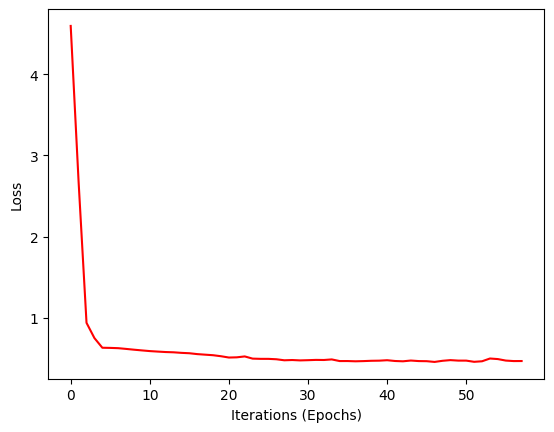

In [ ]:
plt.plot(clf.loss_curve_, c='r')
plt.xlabel('Iterations (Epochs)')
plt.ylabel('Loss')

In [381]:
weights = clf.coefs_

print(weights[1])

[[-0.01786194]
 [ 0.36907384]
 [-0.30322093]
 [ 0.2248928 ]
 [ 0.19558628]
 [-0.46085118]
 [-0.12612596]
 [-0.05257694]]


<Axes: >

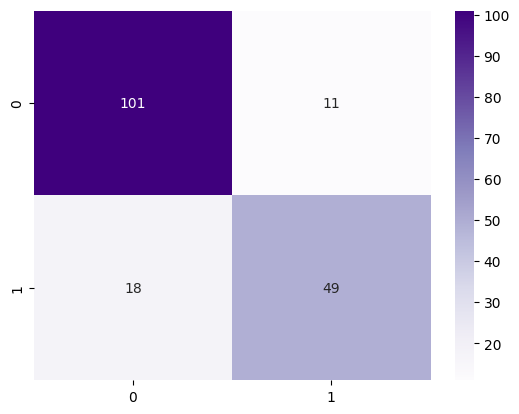

In [386]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='.0f',
    cmap='Purples'
    )